# Pymaceuticals Inc.
---

### Analysis

- When mouse weight increases, so does the tumor weight since the correlation was at a 0.84.
- There are slighly more male than female mice.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_mouse_study=pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')

# Display the data table for preview
df_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count=df_mouse_study["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse=df_mouse_study.loc[df_mouse_study.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df_dup_mouse=df_mouse_study.loc[df_mouse_study['Mouse ID']=='g989',:]
df_dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean_mouse=df_mouse_study[df_mouse_study['Mouse ID'].isin(df_dup_mouse)==False]
df_clean_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count=df_clean_mouse['Mouse ID'].nunique()
new_mice_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=df_clean_mouse['Tumor Volume (mm3)'].groupby(df_clean_mouse['Drug Regimen']).mean()
med=df_clean_mouse['Tumor Volume (mm3)'].groupby(df_clean_mouse['Drug Regimen']).median()
var=df_clean_mouse['Tumor Volume (mm3)'].groupby(df_clean_mouse['Drug Regimen']).var()
std=df_clean_mouse['Tumor Volume (mm3)'].groupby(df_clean_mouse['Drug Regimen']).std()
sem=df_clean_mouse['Tumor Volume (mm3)'].groupby(df_clean_mouse['Drug Regimen']).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
df_summary=pd.DataFrame({"Mean Tumor Volume":mean,'Median Tumor Volume':med,'Tumor Volume Variance':var,
                              'Tumor Volume Std. Dev': std,'Tumor Volume Std. Err.':sem})
df_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  df_clean_mouse.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice vs Drug Regimen')

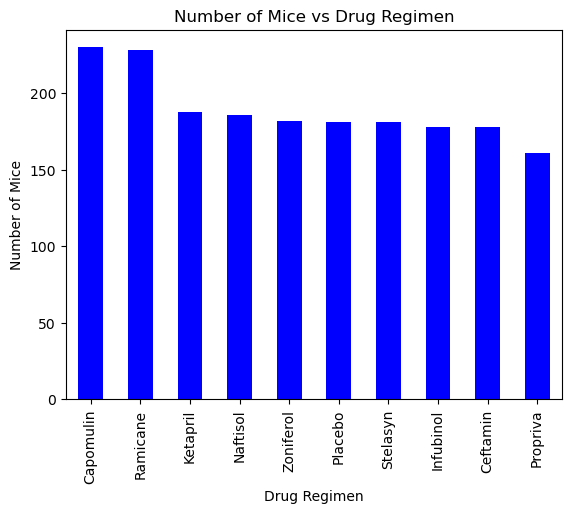

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_mouse=df_clean_mouse["Drug Regimen"].value_counts()
# Create a Pandas bar plot based off of the group series from before and label the title
plot_pandas = drug_mouse.plot.bar(color='blue')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice vs Drug Regimen")

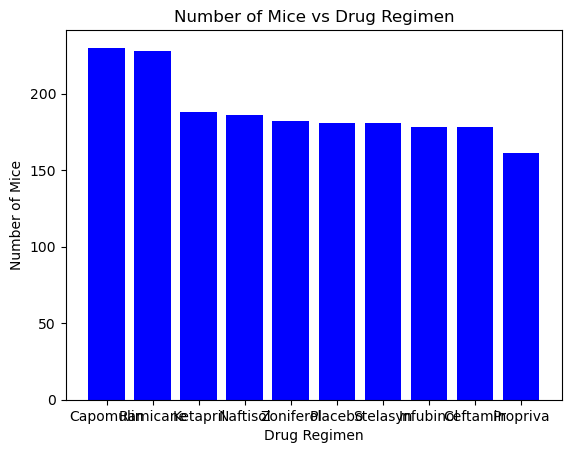

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_mouse.index.values
y_axis = drug_mouse.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='blue')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice vs Drug Regimen")

plt.show()

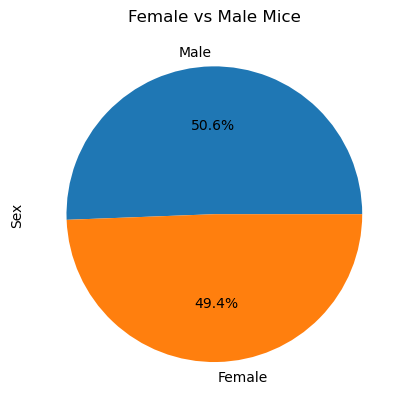

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mouse=df_clean_mouse["Sex"].value_counts()
gender_mouse.plot.pie(autopct="%1.1f%%")
plt.title("Female vs Male Mice")
plt.show()

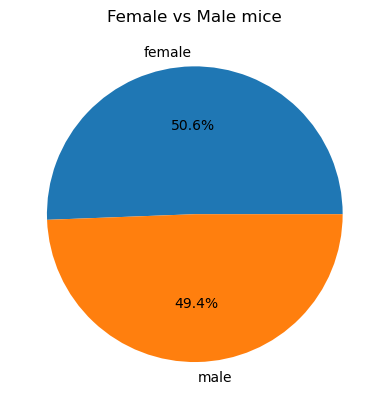

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["female","male"]
pie_chart=plt.pie(gender_mouse,labels=labels,autopct="%1.1f%%")
plt.title("Female vs Male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df_cap=df_clean_mouse.loc[df_clean_mouse["Drug Regimen"]=="Capomulin",:]
df_ram=df_clean_mouse.loc[df_clean_mouse["Drug Regimen"]=="Ramicane",:]
df_inf=df_clean_mouse.loc[df_clean_mouse["Drug Regimen"]=="Infubinol",:]
df_cef=df_clean_mouse.loc[df_clean_mouse["Drug Regimen"]=="Ceftamin",:]

In [18]:
# Start by getting the last (greatest) timepoint for each mouse
#Capomulin
cap_last=df_cap.groupby('Mouse ID').max()['Timepoint']
cap_vol=pd.DataFrame(cap_last)
cap_merge=pd.merge(cap_vol,df_clean_mouse, on=("Mouse ID","Timepoint"),how="left")
cap_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [20]:
#Capomulin
cap_tumors=cap_merge["Tumor Volume (mm3)"]

quartiles = cap_tumors.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartiles of Capomulin tumors: {lowerq}")
print(f"The upper quartiles of Capomulin tumors: {upperq}")
print(f"The  interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[.5]}")
 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")                                                
                                                   

The lower quartiles of Capomulin tumors: 32.37735684
The upper quartiles of Capomulin tumors: 40.1592203
The  interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [23]:
#Ramicane
ram_last=df_ram.groupby('Mouse ID').max()['Timepoint']
ram_vol=pd.DataFrame(ram_last)
ram_merge=pd.merge(ram_vol,df_clean_mouse, on=("Mouse ID","Timepoint"),how="left")
ram_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [25]:
#Ramicane
ram_tumors=ram_merge["Tumor Volume (mm3)"]

quartiles = ram_tumors.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartiles of Ramicane tumors: {lowerq}")
print(f"The upper quartiles of Ramicane tumors: {upperq}")
print(f"The  interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[.5]}")
 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")                                                
                                   

The lower quartiles of Ramicane tumors: 31.56046955
The upper quartiles of Ramicane tumors: 40.65900627
The  interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [ ]:
#Infubinol
inf_last=df_inf.groupby('Mouse ID').max()['Timepoint']
inf_vol=pd.DataFrame(inf_last)
inf_merge=pd.merge(inf_vol,df_clean_mouse, on=("Mouse ID","Timepoint"),how="left")
inf_merge.head()

In [26]:
#Infubinol
inf_tumors=inf_merge["Tumor Volume (mm3)"]

quartiles = inf_tumors.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartiles of Infubinol tumors: {lowerq}")
print(f"The upper quartiles of Infubinol tumors: {upperq}")
print(f"The  interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[.5]}")
 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")                                                
                                   

The lower quartiles of Infubinol tumors: 54.04860769
The upper quartiles of Infubinol tumors: 65.52574285
The  interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [28]:
#Ceftamin
cef_last=df_cef.groupby('Mouse ID').max()['Timepoint']
cef_vol=pd.DataFrame(cef_last)
cef_merge=pd.merge(cef_vol,df_clean_mouse, on=("Mouse ID","Timepoint"),how="left")
cef_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [29]:
#Ceftamin
cef_tumors=cef_merge["Tumor Volume (mm3)"]

quartiles = cef_tumors.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartiles of Ceftamin tumors: {lowerq}")
print(f"The upper quartiles of Ceftamin tumors: {upperq}")
print(f"The  interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[.5]}")
 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")                                                
                                   

The lower quartiles of Ceftamin tumors: 48.72207785
The upper quartiles of Ceftamin tumors: 64.29983003
The  interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


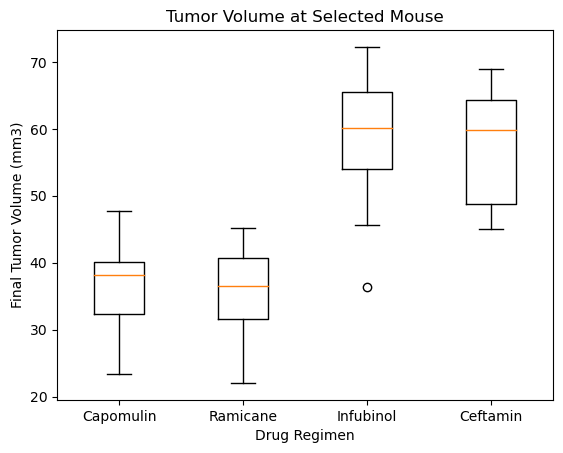

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [cap_tumors, ram_tumors, inf_tumors, cef_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

In [31]:
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

drugs= df_mouse_study[df_mouse_study["Drug Regimen"].isin(drug_list)]
drugs.head()

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

#reshaped
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
     print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment=0

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volum
# add subset 
# Determine outliers using upper and lower bounds
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[.25].round(2)
    upperq = quartiles[.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if treatment == 0:
        print(f"--------------------------------------------")
        print(f"The lower quartile of {drug} treatment is: {lowerq}")
        print(f"The upper quartile of {drug} treatment is: {upperq}")
        print(f"The interquartile range of {drug} treatments is {iqr}")
        print(f"Values below {lower_bound} could be{drug} outliers.")
        print(f"Values above {upper_bound} could be{drug} outliers.")
        print(f"--------------------------------------------------")
        treatment+=1

--------------------------------------------
The lower quartile of Capomulin treatment is: 32.38
The upper quartile of Capomulin treatment is: 40.16
The interquartile range of Capomulin treatments is 7.78
Values below 20.71 could beCapomulin outliers.
Values above 51.83 could beCapomulin outliers.
--------------------------------------------------


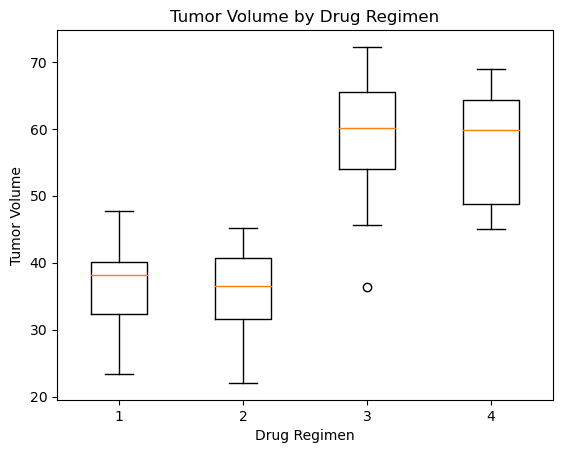

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = []
for i in drug_regimen:
    box_plot.append(list(last_timepoint[i].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(box_plot)
plt.show()

## Line and Scatter Plots

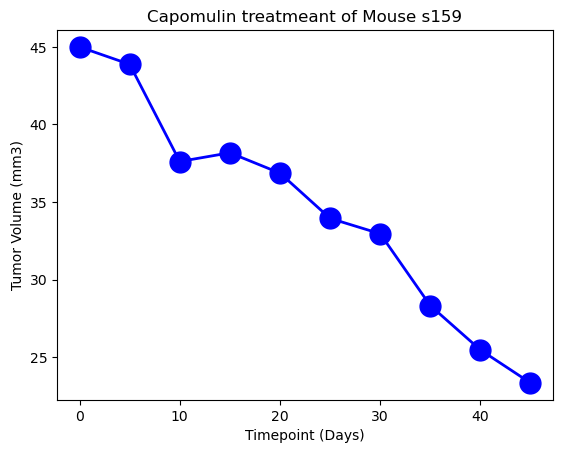

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_s185=df_cap.loc[df_cap['Mouse ID']=="s185",:]
cap_s185.head()

x_axis = cap_s185["Timepoint"]
tumsiz = cap_s185["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of Mouse s159')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

/var/folders/_z/y17b_m151jb68st8bhhh9g_w0000gn/T/ipykernel_28841/3219777589.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_cap_reg =df_cap.groupby(['Mouse ID']).mean()


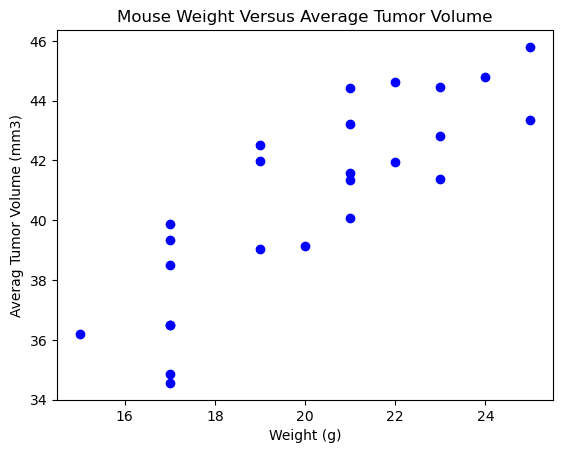

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
f1= plt.subplots()
avg_cap_reg =df_cap.groupby(['Mouse ID']).mean()

plt.scatter(avg_cap_reg['Weight (g)'],avg_cap_reg['Tumor Volume (mm3)'],color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
The r-squared is: 0.709


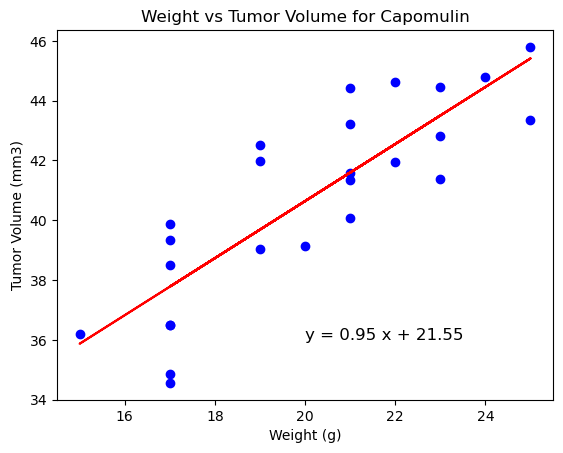

In [41]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coef=round(st.pearsonr(avg_cap_reg['Weight (g)'],avg_cap_reg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr_coef}")

(slope, intercept,rvalue,pvalue,stderr)= st.linregress(avg_cap_reg["Weight (g)"],avg_cap_reg["Tumor Volume (mm3)"])
regress_values=avg_cap_reg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(avg_cap_reg["Weight (g)"],avg_cap_reg["Tumor Volume (mm3)"],color="b")
plt.plot(avg_cap_reg["Weight (g)"], regress_values, color="red")
plt.annotate(line_eq,(20,36), fontsize=12)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()